## Ruben Abbou
## Presidential logorrhea study

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import json
import re

In [15]:
with open('speeches.json', 'r') as f:
    speeches = json.loads(f.read())

### (a)

In [16]:
SOU = []
for speech in speeches:
    text = speech['text'].replace('\r', ' ').replace('\n', '') \
                .replace('\t', '').replace('  ', ' ')
#     general splitting rule which was the most succesful with my trials
#     Does not split Mr.
    text = list(re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text))
    text = [re.sub(r"^\s+|\s+$", "", x) for x in text] #remove trailing and leading spaces
    text = [x for x in text if len(x) > 2]  #remove sentences of less than 2 characters
    SOU.append((speech['year'], text, speech['president']))

### (b)

In [17]:
counts = []
for speech in SOU:
    counts.append(list([speech[0],
                        len(speech[1]),
                        np.mean([len(sen.split()) for sen in speech[1]]),
                        np.sum([len(sen.split()) for sen in speech[1]]),
                        speech[2]
                        ]))
data = np.copy(counts)
counts = np.array(data[:,:4], dtype='float64')

In [18]:
def LS(X, y):
    X = np.insert(X.reshape(-1,1), 0, np.ones(X.shape[0]), axis = 1)
    b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return X.dot(b)

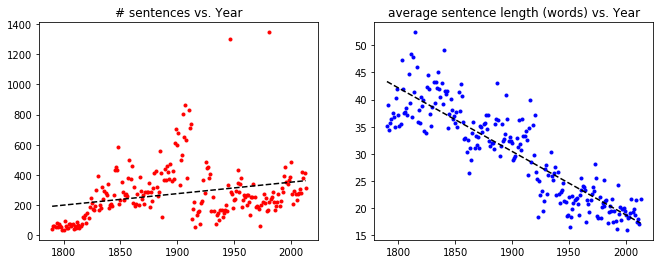

In [19]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(11,4)
years, sent, words = counts[:,0], counts[:,1], counts[:,2]
ax[0].plot(years, sent, 'r.',
           years, LS(years, sent), '--k')
ax[0].set_title("# sentences vs. Year")
ax[1].plot(years, words, 'b.',
           years, LS(years, words), '--k')
ax[1].set_title("average sentence length (words) vs. Year")
plt.show()

The total number of sentences is slightly increasing over the years, but the significance of the model can be questionned, since a lot of data points are far from the regression. There may have been a change of format of the SOU (duration for instance) over the years which could have lead to these disparities.

On the other hand, the average sentence length seems to be following a very significant decreasing slope over the years.  This could be due to the will of presidents to decrease the length of their speeches, and follow new standards such as a potential decrease in speech durations. Changes in the formality of language could also have impact the length of sentences (more familiar, short sentences).

### (c)

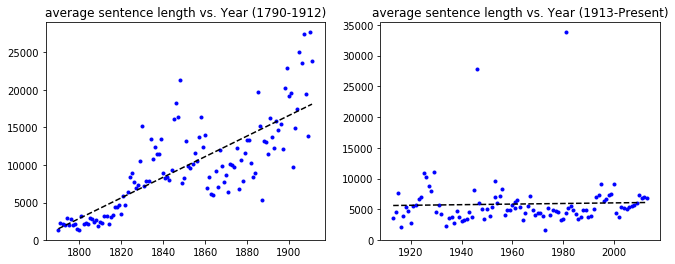

In [20]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(11,4)
tot_words = counts[:,3]
years0 = years[years < 1912]
tot_words0 = tot_words[years < 1912]
years1 = years[years > 1912]
tot_words1 = tot_words[years > 1912]
ax[0].plot(years0, tot_words0, 'b.',
           years0, LS(years0, tot_words0), '--k')
ax[0].set_title("average sentence length vs. Year (1790-1912)")
ax[1].plot(years1, tot_words1, 'b.',
           years1, LS(years1, tot_words1), '--k')
ax[1].set_title("average sentence length vs. Year (1913-Present)")
plt.show()

In [21]:
tot_words[years == 1981]

array([ 4431., 33794.])

We see that before 1912, there is an increasing trend in the word count per year, while after 1912, the data remains relatively constant around 5500 words a year, with a few exceptions. I learnt in wikipedia that the SOU addresses were in written form from 1801 to 1912, and became spoken in 1913. This would therefore explain the obtained regressions since people generally try to shorten their speeches when doing oral speeches to not go over a certain time, while the length matters less when it is delivered in written form, and can get very long.

We can actually see than one of our outliers in the second graph (1913-present) was a written message by Jimmy Carter in 1981!

### (d)

In [22]:
presidents = {}
for speech in data:
    if speech[4] in (presidents.keys()):
        presidents[speech[4]][0] += float(speech[3])
        presidents[speech[4]][1] += float(speech[1])
    else:
        presidents[speech[4]] = list((float(speech[3]),float(speech[1])))
nums = []
for pres in presidents.keys():
    nums.append((pres, presidents[pres][0]/presidents[pres][1]))

In [23]:
ma = max(nums, key=lambda x:x[1])
print("President", ma[0],
      "has the longest sentences on average with an average of", 
      '%.2f' % ma[1], "words per sentence.")
mi = min(nums, key=lambda x:x[1])
print("President", mi[0],
      "has the shortest sentences on average with an average of", 
      '%.2f' % mi[1], "words per sentence.")
print("The median rate of words per sentence is", '%.2f' % np.median([x[1] for x in nums]))
print("The 25% quantile is", '%.2f' % np.quantile([x[1] for x in nums], .25))
print("The 75% quantile is", '%.2f' % np.quantile([x[1] for x in nums], .75))

President James Madison has the longest sentences on average with an average of 44.21 words per sentence.
President George Bush has the shortest sentences on average with an average of 17.46 words per sentence.
The median rate of words per sentence is 32.30
The 25% quantile is 23.46
The 75% quantile is 36.50


In [24]:
sentences = [x[1] for x in SOU]
sentences = [sent for speech in sentences for sent in speech]
# looking at the number of characters to find the shortest sentence,
# since there may be several if length 1
longest = sentences[np.argmax([len(x) for x in sentences])]
shortest = sentences[np.argmin([len(x) for x in sentences])]
print("The shortest sentence ever spoken was", len(shortest.split()),
      "word and", len(shortest), "characters.")
print("Shortest sentence:", shortest, "")
print("The longest sentence ever spoken was", len(longest.split()),
      "word and", len(longest), "characters.")
print("Longest sentence: ", longest)

The shortest sentence ever spoken was 1 word and 3 characters.
Shortest sentence: GO. 
The longest sentence ever spoken was 602 word and 5079 characters.
Longest sentence:  It shows that the ordinary revenues from all sources for the fiscal year ended June 30, 1883, amounted to $398,287,581.95, whereof there was received--        From customs   $214,706,496.93      From internal revenue   144,720,368.98      From sales of public lands   7,955,864.42      From tax on circulation and deposits of national banks   9,111,008.85      From profits on coinage, bullion deposits, and assays   4,460,205.17      From other sources   17,333,637.60        Total      398,287,581.95          For the same period the ordinary expenditures were:        For civil expenses   $22,343,285.76      For foreign intercourse   2,419,275.24      For Indians   7,362,590.34      For Pensions   66,012,573.64      For the military establishment, including river and harbor  improvements and arsenals   48,911,382.93    